# Hypothesis Testing

In [17]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import env

#### 1. Answer with the type of test you would use (assume normal distribution):
- Answer with the type of test you would use (assume normal distribution):
- Are adults who drink milk taller than adults who don't drink milk?

two-sample t-test (stats.ttest_ind), we also care about direction, so one-tailed
- Is the the price of gas higher in texas or in new mexico?

two_sample t-test (stats.ttest_ind), we don't seem to care whether it's Texas or New Mexico that's higher, so two-tailed.
- Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

ANOVA test (stats.f_oneway) since we are comparing variance across three subsets.


#### 2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.



In [10]:
# what kind of test do we need? 
    # we are comparing two subgroups to each other
    # two-sample test
    # two_tailed since directionality is not important
    
# Verify assumptions
    #Independent samples: yes!
    #Normal distributions: samples are over 30 so yes!
    #Equal Variances: variance #1 = 225 != variance #2 = 400
    

#### H$_0$: there is a significant difference between Ace Office #1 and Ace Office #2 in the time it takes to sell a house.
#### H$_a$: there is a significant difference between Ace Office #1 and Ace Office #2 in the time it takes to sell a house.

In [11]:
α = 0.05
stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50, equal_var=False)

Ttest_indResult(statistic=-2.7091418459143854, pvalue=0.00811206270346016)

In [12]:
t_stat, p_value = stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50, equal_var=False)

In [13]:
t_stat

-2.7091418459143854

In [14]:
p_value

0.00811206270346016

In [15]:
p_value < α

True

In [16]:
# p is less than α therefore, at the 95% confidence level 
# we can reject the null hypothesis. that the true mean time 
# to sell a house at Office #1 and Office #2 are the same.

#### 3. Load the mpg dataset and use it to answer the following questions:
- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Are compact cars more fuel-efficient than the average car?


In [17]:
mpg = data('mpg')

In [18]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


#### 3a. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [19]:
# what is the question? cty mpg, hwy mpg? I'll use the average of the two
# create a column cty_hwy_avg

# what type of test?
# two-sample test as we're comparing two subgroups of same population
# two-tailed test as we are looking for difference, not direction

# Verify assumptions
    #Randomness: yes. assuming the mpg sampling methodology was good.
    #Independent samples: yes!
    #Normal distributions:  even though the distributions are not exactly normal, 
        #with sample size of 117 and no significant outliers, by the CLT 
        #they should produce normal distributions of the sample means.
    #Equal Variances: No. Will use equal_var=False

In [20]:
mpg['cty_hwy_avg'] = (mpg.cty + mpg.hwy) / 2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,cty_hwy_avg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [21]:
mpg_2008 = mpg[mpg.year == 2008].cty_hwy_avg
mpg_1999 = mpg[mpg.year == 1999].cty_hwy_avg
print(f'There were {len(mpg_1999)} models in 1999\n and {len(mpg_2008)} models in 2008.' )

There were 117 models in 1999
 and 117 models in 2008.


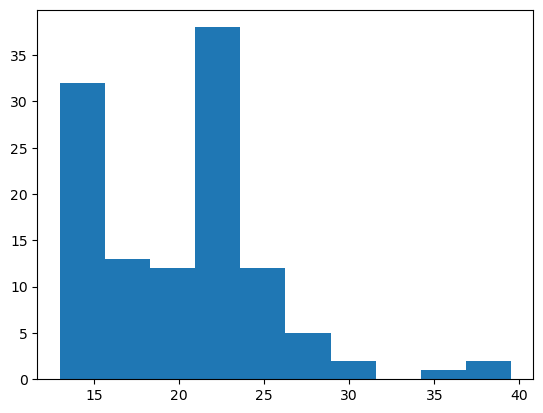

In [22]:
plt.hist(mpg_1999)
plt.show()

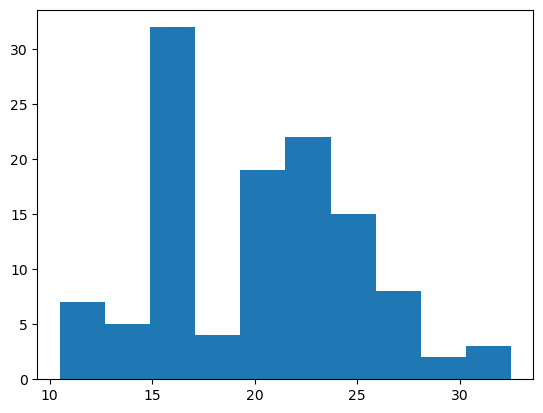

In [23]:
plt.hist(mpg_2008)
plt.show()

In [24]:
# even though the distributions are not exactly normal, with sample size of 117,
# and no significant outliers, by the CLT they should produce normal distributions
# of the sample means.

In [25]:
# test the relative variance:
stats.levene(mpg_1999, mpg_2008)

LeveneResult(statistic=0.033228136671080453, pvalue=0.855517569468803)

In [26]:
# the p_value > α=0.05, therefore reject H0 that variances are equal.

In [27]:
t_stat_3a, p_value_3a = stats.ttest_ind(mpg_1999, mpg_2008, equal_var=True)

In [28]:
t_stat_3a

0.21960177245940962

In [29]:
p_value_3a

0.8263744040323578

In [30]:
p_value_3a < α

False

#### 3a. ANSWER: p is not less than alpha, therefore cannot reject the null hypothesis that there is a significant difference between the mean mpg in 2008 and 1999.

#### 3b. - Are compact cars more fuel-efficient than the average car?


In [31]:
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,cty_hwy_avg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5


In [32]:
# 'compact' is a subcategory of 'class' column
# comparing to *all* cars so...
# Type of test will be one-sample
# 'Are compact *more* fuel efficient?' so this is one-tailed test

# validation of assumptions:
    # Random: assuming the mpg sampling methodology was good.
    # Independence: Yes. compact will be separated from all cars
    # Normal: yes, and over thirty sample sizes
    # Equal Var: n/a for this type of test


H$_0$: Compact cars are less than or the same fuel efficiency as the average car

H$_a$: Compact cars are more fuel efficient than the overall average of cars

In [33]:
compact_mpg = mpg[mpg['class'] == 'compact'].cty_hwy_avg
print(f'There were {len(compact_mpg)} compact models\n and {len(mpg.model)} total models in the dataset.' )


There were 47 compact models
 and 234 total models in the dataset.


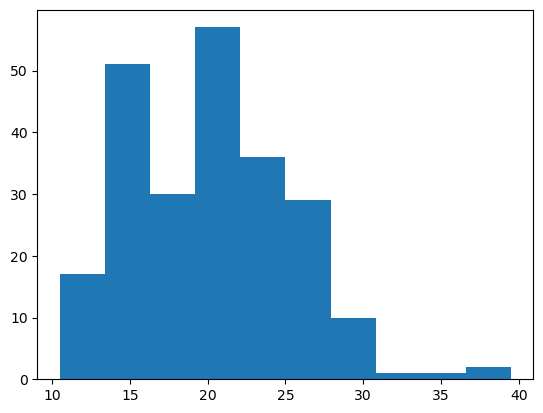

In [34]:
plt.hist(mpg.cty_hwy_avg)
plt.show()

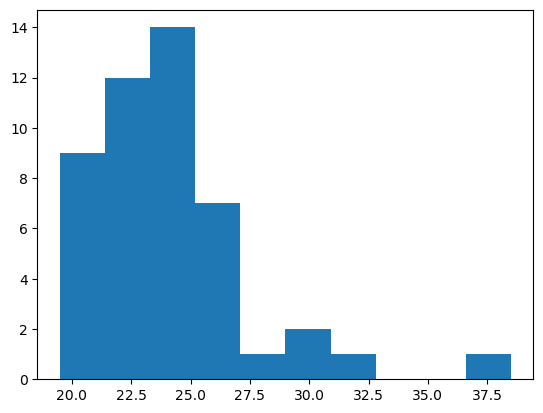

In [35]:
plt.hist(compact_mpg)
plt.show()

In [36]:
avg_mpg_all_models = mpg.cty_hwy_avg.mean()
avg_mpg_all_models
t_stat_3b, p_value_3b = stats.ttest_1samp(compact_mpg, avg_mpg_all_models)
print(f't={t_stat_3b}, p={p_value_3b}')

t=7.896888573132533, p=4.1985637943171486e-10


In [37]:
# divide p by two for one_tail test:
(p_value_3b / 2 < α) & (t_stat_3b > 0)

True

#### 3b. ANSWER: p/2 < α, t > 0 therefore reject the null hypothesis that compact cars have the same fuel efficiency as the average car. 

#### 3c. Do manual cars get better gas mileage than automatic cars?


In [38]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,cty_hwy_avg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [39]:
# have to filter the 'trans' column for manual and auto and store as vars

auto_trans_mpg = mpg[mpg.trans.str.startswith('auto')].cty_hwy_avg
man_trans_mpg = mpg[mpg.trans.str.startswith('manual')].cty_hwy_avg

# Type of test needed:
#     two-sample t-test because of two subcategories
#     one_tailed because asking for directionality
# validate assumptions:
#     random: yes. trusting study methodology
#     independent: yes. two separate subcategories
#     normal: yes.
#     variance equal?: No. Must use Walsh option

H$_0$: manual transmission cars get the same or worse gas mileage than automatic cars

H$_a$: manual transmission cars get better gas mileage than automatic cars.

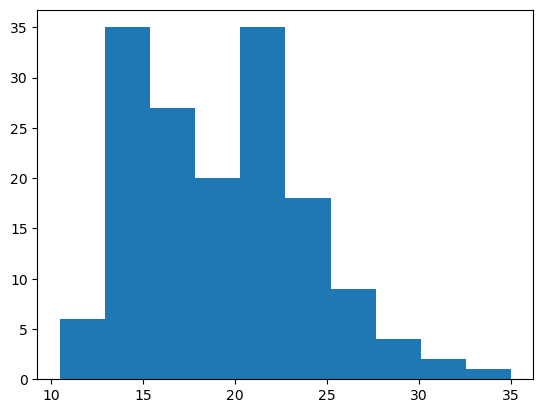

In [40]:
# check for normalcy
plt.hist(auto_trans_mpg)
plt.show()

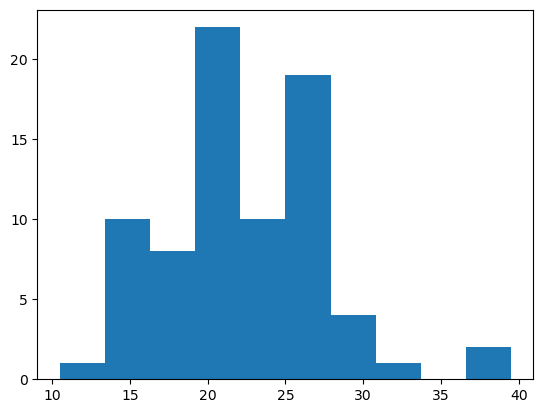

In [41]:
plt.hist(man_trans_mpg)
plt.show()

In [42]:
#both normal-ish

In [43]:
# check for equal variance with levene
stats.levene(man_trans_mpg, auto_trans_mpg)

LeveneResult(statistic=0.20075824847529639, pvalue=0.6545276355131857)

In [44]:
# cannot reject the null hyp that the variances are equal


In [45]:
t_stat_3c, p_value_3c = stats.ttest_ind(man_trans_mpg, auto_trans_mpg, equal_var=False)

In [46]:
(p_value_3c / 2 < α) & (t_stat_3c > 0)

True

In [47]:
t_stat_3c

4.443514012903072

In [48]:
p_value_3c

1.7952248999917893e-05

#### 3c. Reject the null hypothesis that manual transmission cars get the same or worse gas mileage than automatic cars.

# Correlation Exercises

#### 1. Answer with the type of stats test you would use (assume normal distribution):

- a. Is there a relationship between the length of your arm and the length of your foot?

These are both continuous variables and they aren't being compared to a categorical. So I would use a ***pearson's r test*** to check for a linear relationship.

- b. Do guys and gals quit their jobs at the same rate?

Here we are comparing guys quitting to gals quitting. We could probably find data that frames this as continuous data against population and or time, but I think a comparison of two categoricals, [guys, gals] & [staying, quit] would be best. To test two categoricals we would need to use a ***chi-squared test***.

- c. Does the length of time of the lecture correlate with a students grade?

If we assess grades as a continuous variable and length of lecture as a continuous variable, and not being compared to a categorical, then I would use a ***pearson's r test*** to check for a linear relationship between the variables


#### 2. Use the telco_churn data.

In [49]:
telco = pd.read_csv('/Users/donq/codeup-data-science/sample_datasets/telco_churn.csv')
telco.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [50]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


a. Does tenure correlate with monthly charges?

In [51]:
# tenure and monthly charges are both continuous variables, 
# so use a pearson's r test to check for a linear relationship.

$H_0$: there is no linear relationship between tenure and monthly charges

$H_a$: there is a linear relationship between tenure and monthly charges

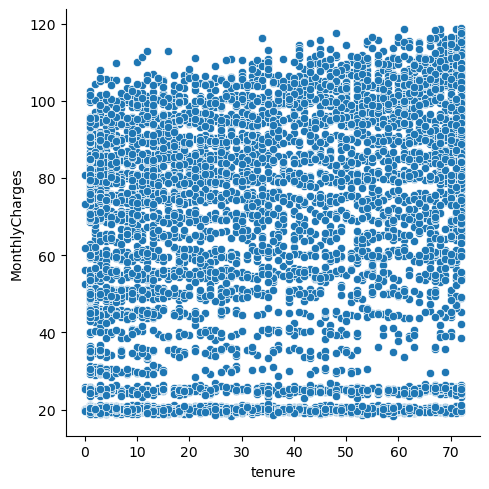

In [52]:
sns.relplot(x = telco.tenure, y = telco.MonthlyCharges)
plt.show()

In [53]:
# this scatterplot is all over the map. Feed it to pearsonr
# to see if there is correlation.

In [54]:
r, p = stats.pearsonr(telco.tenure, telco.MonthlyCharges)

In [55]:
if p < α:
    print('We can reject the null hypothesis')
    print(f'We can say with a p-value of {p} that this relationship is not totally independent.')
else:
    print('We failed to reject the null hypothesis')

We can reject the null hypothesis
We can say with a p-value of 4.094044991483017e-99 that this relationship is not totally independent.


In [56]:
r

0.2478998562861525

In [57]:
# the correlation is quite low at ~ 0.25, but there are so many data points
# that the p-value is actually very, very high.

b. Total charges?

In [58]:
# for some reason TotalCharges is dType: Object
# cast to float, didn't work. Try removing commas first. 
# must be something else. Try spaces
pd.reset_option('display.max_rows')

# telco.TotalCharges.str.strip(' ').replace(',', '', inplace=True)
telco.TotalCharges = pd.to_numeric(telco.TotalCharges, errors='coerce')
telco_clean = telco.dropna(subset = 'TotalCharges')

# pd.to_numeric(telco.TotalCharges, )
# telco_clean = telco.dropna(axis=0, subset='TotalCharges')

# telco = telco[telco.TotalCharges != '']
# telco.TotalCharges = telco.TotalCharges.astype('float')
# pd.to_numeric(telco.TotalCharges, errors='coerce') = telco.TotalCharges.
telco_clean.TotalCharges.dtype


dtype('float64')

In [59]:
telco_clean

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [60]:
stats.pearsonr(telco_clean.tenure, telco_clean.TotalCharges)

PearsonRResult(statistic=0.8258804609332093, pvalue=0.0)

In [61]:
if p < α:
    print('We can reject the null hypothesis')
    print(f'We can say with a p-value of {p} that this relationship is not totally independent.')
else:
    print('We failed to reject the null hypothesis')

We can reject the null hypothesis
We can say with a p-value of 4.094044991483017e-99 that this relationship is not totally independent.


c. What happens if you control for phone and internet service?


In [62]:
tc = telco_clean
tc.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [63]:
int_types = tc.InternetService.unique()
int_types

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [64]:
phone_types = tc.PhoneService.unique()
phone_types

array(['No', 'Yes'], dtype=object)

In [65]:
tc_dsl_no = tc[(tc.InternetService == 'DSL') & (tc.PhoneService == 'No')]
tc_dsl_yes = tc[(tc.InternetService == 'DSL') & (tc.PhoneService == 'Yes')]
tc_no_no = tc[(tc.InternetService == 'No') & (tc.PhoneService == 'No')]
tc_no_yes = tc[(tc.InternetService == 'No') & (tc.PhoneService == 'Yes')]
tc_fiber_no = tc[(tc.InternetService == 'Fiber optic') & (tc.PhoneService == 'No')]
tc_fiber_yes = tc[(tc.InternetService == 'Fiber optic') & (tc.PhoneService == 'Yes')]


In [66]:
r_dn, p_dn = stats.pearsonr(tc_dsl_no.tenure, tc_dsl_no.TotalCharges)

if p_dn < α:
    print('We can reject the null hypothesis')
    print(f'We can say with a p-value of {p_dn} that this relationship is not totally independent.')
else:
    print('We failed to reject the null hypothesis')
print(r_dn)

We can reject the null hypothesis
We can say with a p-value of 0.0 that this relationship is not totally independent.
0.953422850695451


In [74]:
r_dy, p_dy = stats.pearsonr(tc_dsl_yes.tenure, tc_dsl_yes.TotalCharges)

if p_dy < α:
    print('We can reject the null hypothesis')
    print(f'We can say with a p-value of {p_dy} that this relationship is not totally independent.')
else:
    print('We failed to reject the null hypothesis')
print(r_dy)

We can reject the null hypothesis
We can say with a p-value of 0.0 that this relationship is not totally independent.
0.9705325404027028


In [75]:
r_nn, p_nn = stats.pearsonr(tc_dsl_no.tenure, tc_dsl_no.TotalCharges)

if p_nn < α:
    print('We can reject the null hypothesis')
    print(f'We can say with a p-value of {p_nn} that this relationship is not totally independent.')
else:
    print('We failed to reject the null hypothesis')
print(r_nn)

We can reject the null hypothesis
We can say with a p-value of 0.0 that this relationship is not totally independent.
0.953422850695451


In [76]:
r_ny, p_ny = stats.pearsonr(tc_no_yes.tenure, tc_no_yes.TotalCharges)

if p_ny < α:
    print('We can reject the null hypothesis')
    print(f'We can say with a p-value of {p_ny} that this relationship is not totally independent.')
else:
    print('We failed to reject the null hypothesis')
print(r_ny)

We can reject the null hypothesis
We can say with a p-value of 0.0 that this relationship is not totally independent.
0.9814648859044293


In [70]:
# phone service must be included with fiber as all fiber users have phone service

In [77]:
r_fy, p_fy = stats.pearsonr(tc_fiber_yes.tenure, tc_fiber_yes.TotalCharges)

if p_fy < α:
    print('We can reject the null hypothesis')
    print(f'We can say with a p-value of {p_fy} that this relationship is not totally independent.')
else:
    print('We failed to reject the null hypothesis')
print(r_fy)

We can reject the null hypothesis
We can say with a p-value of 0.0 that this relationship is not totally independent.
0.9853093528070652


We can reject the null hypothesis even when controlling for any and all combinations of phone and internet service.

#### 3. Use the employees database.
    


In [ ]:
emp_query = '''
select * from employees
join salaries using(emp_no)
join titles using(emp_no)
limit 10000;
'''

In [80]:
url = env.get_db_url('employees')
df = pd.read_sql('select * from employees join salaries using(emp_no) join titles using(emp_no);', url)

KeyboardInterrupt: 

a. Is there a relationship between how long an employee has been with the company and their salary?


b. Is there a relationship between how long an employee has been with the company and the number of titles they have had?


#### 4. Use the sleepstudy data.
- Is there a relationship between days and reaction time?


In [83]:
sleep = data('sleepstudy')
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [ ]:
# we are comparing two continuous variables and need a pearsonr test

H$_0$: there is no linear relationship between reaction and days

H$_a$: there is a linear relationship between reaction and days

In [85]:
α

0.05

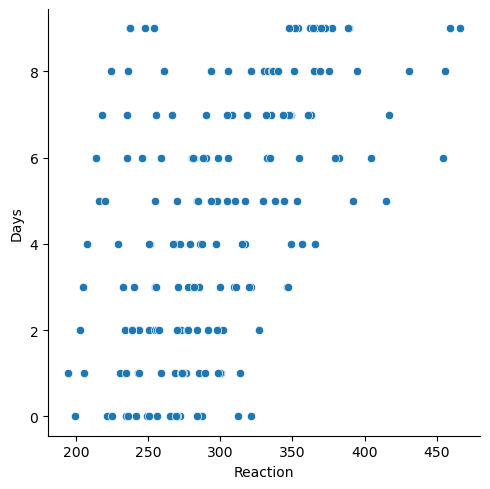

In [87]:
sns.relplot(x=sleep.Reaction, y=sleep.Days, data=sleep)
plt.show()

In [90]:
# there appears to be a correlation, let's check
r_sleep, p_sleep = stats.pearsonr(sleep.Reaction, sleep.Days)

In [93]:
if p_sleep < α:
    print('We can reject the null hypothesis')
    print(f'We can say with a p-value of {p_sleep} that this relationship is not totally independent.')
else:
    print('We failed to reject the null hypothesis')
print(f'r = {r_sleep}')

We can reject the null hypothesis
We can say with a p-value of 9.89409632221439e-15 that this relationship is not totally independent.
r = 0.5352302262650255


# Comparing Group Membership Exercises (chi^2)

#### 1. Answer with the type of stats test you would use (assume normal distribution):



- Do students get better test grades if they have a rubber duck on their desk?

***one-sample, one-tailed t-test***: Comparing a subgroup of students (category) against the mean of all students

- Does smoking affect when or not someone has lung cancer?


***chi^2***: Comparing two categories (smoker? and lung cancer?)

- Is gender independent of a person’s blood type?


***chi^2***: Comparing two categories (gender? and blood type?)


- A farming company wants to know if a new fertilizer has improved crop yield or not


***one-sample, one-tailed t-test***: comparing a category (new fertilizer v all) greater than a continuous (crop yield)

- Does the length of time of the lecture correlate with a students grade?


***pearsons r***: correlation of two continuous variables

- Do people with dogs live in apartments more than people with cats?


***chi^2***: comparing two categorical vars (dog or cat?, apt or no?)

- Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.



In [96]:
observed = pd.DataFrame(
    {'codeup_student': [49, 1], 
     'not_student' : [20, 30]
    }, index=['macbook_user', 'not_macbook']
)

In [97]:
observed

,codeup_student,not_student
macbook_user,49,20
not_macbook,1,30


H$_0$: There is no dependence between being a codeup student and being a macbook user

H$_a$: This is a dependence between being a codeup student and being a macbook user

In [98]:
chi2, p, _, expected = stats.chi2_contingency(observed)

In [99]:
chi2

36.65264142122487

In [100]:
p < α

True

In [103]:
expected

array([[34.5, 34.5],
       [15.5, 15.5]])

In [104]:
_

1

p < alpha so we reject the null hypothesis that there is no dependence between being a codeup student and being a macbook user

#### 3. Choose another 2 categorical variables from the mpg dataset and perform a chi^2 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [102]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,cty_hwy_avg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


H$_0$: there is no dependence between drive type and year

H$_a$: there is dependence between drive type and year

In [106]:
observed = pd.crosstab(mpg.drv, mpg.year)
observed

year,1999,2008
drv,,
4,49,54
f,57,49
r,11,14


In [112]:
chi2, p, dof, expected = stats.chi2_contingency(observed)
chi2

1.206492031507602

In [115]:
if p < α:
    print(f'We can reject the null hypothesis, {p} < {α}')
else:
    print('We cannot reject the null hypothesis')
print(f'α = {α}, χ^2 = {chi2}, p = {p}')

We cannot reject the null hypothesis
α = 0.05, χ^2 = 1.206492031507602, p = 0.547033073060878


#### 4. Use the data from the employees database to answer these questions:


#### a. Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)


In [116]:
# are two categorical vars (gender, sales/marketing), so chi^2
# need columns from sequel for emp_no, gender, dept_name
# then crosstab gender and department name

In [118]:
query = '''
    select emp_no, gender, dept_name
        from employees
            join dept_emp
                using (emp_no)
            join departments
                using (dept_no)
        where to_date = '9999-01-01'
        and dept_name in ('Marketing','Sales')'''

In [122]:
url = env.get_db_url('employees')

In [125]:
gender_dept = pd.read_sql(query, url)
gender_dept.head()

,emp_no,gender,dept_name
0,10017,F,Marketing
1,10058,M,Marketing
2,10140,F,Marketing
3,10228,F,Marketing
4,10239,F,Marketing


In [126]:
observed = pd.crosstab(gender_dept.gender, gender_dept.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [127]:
chi2, p, dof, expected = \
stats.chi2_contingency(observed)

In [128]:
if p < α:
    print(f'We can reject the null hypothesis, {p} < {α}')
else:
    print('We cannot reject the null hypothesis')
print(f'α = {α}, χ^2 = {chi2}, p = {p}')

We cannot reject the null hypothesis
α = 0.05, χ^2 = 0.3240332004060638, p = 0.5691938610810126


#### b. Is an employee's gender independent of whether or not they are or have been a manager?


In [ ]:
# looking for dependence between two categorical vars, gender(m/f) v manager(yes/no)
# so chi^2 test
# this is a confusing question so will make assumptions here:
# can get gender proportion of all managers (past and present) 
# and compare that to the gender proportion of all employees (past and present)
# need query to give emp_no, ever_a_manager, and gender
# then crosstab ever_a_manager and gender

In [40]:
α = 0.05

query = '''
    select e.emp_no, e.gender, t.title
        from employees e
            right join titles t
                using (emp_no)
    ;
'''

In [5]:
url = env.get_db_url('employees')

In [7]:
gender_manager = pd.read_sql(query, url)

In [8]:
gender_manager

,emp_no,gender,title
0,10001,M,Senior Engineer
1,10002,F,Staff
2,10003,M,Senior Engineer
3,10004,M,Engineer
4,10004,M,Senior Engineer
...,...,...,...
443303,499997,M,Engineer
443304,499997,M,Senior Engineer
443305,499998,M,Senior Staff
443306,499998,M,Staff


In [30]:
gen_man_agg_titles = gender_manager.groupby(
    ['emp_no', 'gender'])['title'].agg(
    lambda x: ','.join(x)).reset_index()

In [31]:
gen_man_agg_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   emp_no  300024 non-null  int64 
 1   gender  300024 non-null  object
 2   title   300024 non-null  object
dtypes: int64(1), object(2)
memory usage: 6.9+ MB


In [32]:
gen_man_agg_titles

,emp_no,gender,title
0,10001,M,Senior Engineer
1,10002,F,Staff
2,10003,M,Senior Engineer
3,10004,M,"Engineer,Senior Engineer"
4,10005,M,"Senior Staff,Staff"
...,...,...,...
300019,499995,F,Engineer
300020,499996,M,"Engineer,Senior Engineer"
300021,499997,M,"Engineer,Senior Engineer"
300022,499998,M,"Senior Staff,Staff"


In [35]:
gen_man_agg_titles['is_was_manager'] = gen_man_agg_titles.title.str.contains('Manager')
gen_man_agg_titles.head()

,emp_no,gender,title,is_was_manager
0,10001,M,Senior Engineer,False
1,10002,F,Staff,False
2,10003,M,Senior Engineer,False
3,10004,M,"Engineer,Senior Engineer",False
4,10005,M,"Senior Staff,Staff",False


In [37]:
observed = pd.crosstab(gen_man_agg_titles.gender, gen_man_agg_titles.is_was_manager)

In [38]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [44]:
if p < α:
    print(f'We can reject the null hypothesis, {p} < {α}')
else:
    print('We cannot reject the null hypothesis')
print(f'α = {α}, χ^2 = {chi2}, p = {p}')
print(f'---\nObserved Values\n{observed}')
print(f'---\nExpected Values\n{expected.astype(int)}')

We cannot reject the null hypothesis
α = 0.05, χ^2 = 1.4566857643547197, p = 0.22745818732810363
---
Observed Values
is_was_manager   False  True
gender                      
F               120038    13
M               179962    11
---
Expected Values
[[120041      9]
 [179958     14]]
